<a href="https://colab.research.google.com/github/atalaveracuya/CV/blob/main/Copia_de_Investigaci%C3%B3n_ENAHO3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Análisis de los Determinantes del Ingreso Laboral en Perú: Un Enfoque de regresión Minceriana y Cuantílica**

**Objetivo:**
El objetivo principal de este estudio es identificar y analizar los factores que determinan los ingresos laborales en el contexto peruano, utilizando variables como el nivel educativo, la experiencia laboral, la región y el efecto no lineal de la experiencia laboral. El estudio busca evaluar cómo estas variables afectan el logaritmo del ingreso laboral, tanto en términos generales (con regresión lineal) como en diferentes puntos de la distribución de ingresos (mediante regresión cuantílica). Además, se busca proporcionar una comprensión más detallada de las desigualdades salariales asociadas con las distintas regiones del país.

**Método:**
Para alcanzar los objetivos planteados, se utilizarán dos enfoques principales:

**Regresión Minceriana (OLS) :** Se estimará un modelo de regresión lineal ordinaria (OLS) para examinar el impacto del nivel educativo, la experiencia laboral y la experiencia laboral al cuadrado sobre el ingreso laboral, representado en su forma logarítmica. Este modelo también incluye una variable binaria para la región (Costa/Sierra-Selva), con el fin de evaluar las diferencias salariales entre las distintas regiones del país.

**Regresión Cuantílica :** Se realizará una regresión cuantílica para estimar los coeficientes en distintos puntos de la distribución de ingresos (por ejemplo, en el primer cuartil, la mediana y el tercer cuartil). Esto permitirá analizar cómo los determinantes del ingreso varían a lo largo de la distribución salarial, proporcionando una visión más completa de las disparidades salariales y su relación con las variables explicativas.

Este enfoque metodológico, que combina la regresión lineal y cuantílica, permitirá obtener una perspectiva más robusta sobre los factores que influyen en los ingresos laborales, considerando tanto los efectos promedio como los efectos en diferentes percentiles de la distribución salarial.

**1° Parte: Tratamiento de datos**

**Variables:**

Logaritmo natural del ingreso (ln_ing_lab)

Experiencia laboral (exp=edad-educ-6)

Educación en años (educ)

Región (1=Costa; 0=Sierra o Selva)

In [ ]:
# Importar bibliotecas necesarias
import pandas as pd
from google.colab import files

# Subir archivo de manera manual
print("Sube tu archivo 'EnahoFusionada.dta'")
uploaded = files.upload()

# Cargar el archivo .dta en un DataFrame de pandas
file_name = list(uploaded.keys())[0]  # Obtener el nombre del archivo cargado
df = pd.read_stata(file_name)

# Mostrar información general del DataFrame
print("\nInformación general del DataFrame:")
print(df.info())

# Mostrar las primeras filas para revisar las variables
print("\nPrimeras filas del DataFrame:")
print(df.head())


Sube tu archivo 'EnahoFusionada.dta'


Saving EnahoFusionada.dta to EnahoFusionada.dta

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88388 entries, 0 to 88387
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   index         88388 non-null  int32   
 1   a_o_x         88388 non-null  int16   
 2   conglome      88388 non-null  int16   
 3   vivienda      88388 non-null  int16   
 4   hogar_x       88388 non-null  int8    
 5   codperso      88388 non-null  int8    
 6   edad          88388 non-null  int8    
 7   factor07      88388 non-null  float32 
 8   factora07     88388 non-null  float32 
 9   hhid          88388 non-null  object  
 10  jh            88388 non-null  category
 11  sexo          88388 non-null  category
 12  nived         88317 non-null  category
 13  ebr           88317 non-null  category
 14  lengua        88388 non-null  category
 15  internet      88259 non-null  category
 16  jhm       

In [ ]:
import pandas as pd
import numpy as np  # Asegurarse de importar NumPy
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
# Crear la variable 'exp' (experiencia laboral)
# Supongo que 'edad' y 'educ' están disponibles en el dataset
# Experiencia laboral se calcula como edad - años de educación - 6
df['exp'] = df['edad'] - df['educ'] - 6

In [ ]:
# Reemplazar valores negativos o NaN con 0, en caso de ser necesario
df['exp'] = df['exp'].apply(lambda x: max(x, 0))

In [ ]:
# Verificar la creación de la variable 'exp'
print("\nPrimeras filas con la nueva variable 'exp':")
print(df[['edad', 'educ', 'exp']].head(10))


Primeras filas con la nueva variable 'exp':
   edad  educ   exp
0    43  14.0  23.0
1    41  16.0  19.0
2    60   6.0  48.0
3    59   7.0  46.0
4    38  11.0  21.0
5    30  14.0  10.0
6    29  11.0  12.0
7    81   3.0  72.0
8    58   6.0  46.0
9    50  18.0  26.0


In [ ]:
# Análisis descriptivo de las variables involucradas
variables = ['ln_ing_lab', 'educ', 'exp', 'region_d']

In [ ]:
# Verificar valores faltantes por variable
valores_faltantes = df[variables].isnull().sum()
print("\nValores faltantes por variable:\n", valores_faltantes)


Valores faltantes por variable:
 ln_ing_lab    34878
educ            161
exp             161
region_d          0
dtype: int64


In [ ]:
# Verificar los valores únicos en 'region'
print(df['region'].unique())

['Selva', 'Sierra', 'Costa']
Categories (3, object): ['Costa' < 'Sierra' < 'Selva']


In [ ]:
# Crear la nueva variable 'region_2' basándonos en las categorías de la variable 'region'
df['region_2'] = df['region'].apply(lambda x: 1 if x == 'Costa' else 0)

# Verificar las primeras filas para confirmar la creación de la nueva variable
print(df[['region', 'region_2']].head())


  region  region_2
0  Selva         0
1  Selva         0
2  Selva         0
3  Selva         0
4  Selva         0


In [ ]:
# Verificar los valores únicos en 'region_2'
print(df['region_2'].unique())

# Contar las frecuencias de 'region_2'
print(df['region_2'].value_counts())

# Verificar la relación entre 'region' y 'region_2'
print(pd.crosstab(df['region'], df['region_2']))


[0 1]
region_2
0    48349
1    40039
Name: count, dtype: int64
region_2      0      1
region                
Costa         0  40039
Sierra    29451      0
Selva     18898      0


In [ ]:
# Mapeo explícito para la creación de la nueva variable 'region_2'
region_mapping = {'Costa': 1, 'Sierra': 0, 'Selva': 0}
df['region_2'] = df['region'].map(region_mapping)

# Verificar las primeras filas para confirmar la creación de la nueva variable
print(df[['region', 'region_2']].head())

# Verificar los valores únicos en 'region_2'
print(df['region_2'].unique())

# Contar las frecuencias de 'region_2'
print(df['region_2'].value_counts())

# Verificar la relación entre 'region' y 'region_2'
print(pd.crosstab(df['region'], df['region_2']))


  region  region_2
0  Selva         0
1  Selva         0
2  Selva         0
3  Selva         0
4  Selva         0
[0 1]
region_2
0    48349
1    40039
Name: count, dtype: int64
region_2      0      1
region                
Costa         0  40039
Sierra    29451      0
Selva     18898      0


In [ ]:
# Revisar si las variables tienen valores nulos
nulos = df[['ln_ing_lab', 'exp', 'educ', 'region_2']].isnull().sum()

# Mostrar el resultado
print(nulos)


ln_ing_lab    34878
exp             161
educ            161
region_2          0
dtype: int64


In [ ]:
# Eliminar filas con valores nulos en las columnas 'ln_ing_lab', 'exp', y 'educ'
df_clean = df.dropna(subset=['ln_ing_lab', 'exp', 'educ'])

# Verificar el tamaño del DataFrame después de eliminar las filas con valores nulos
print(df_clean.shape)

# Revisar nuevamente si hay valores nulos
print(df_clean[['ln_ing_lab', 'exp', 'educ', 'region_2']].isnull().sum())


(53478, 34)
ln_ing_lab    0
exp           0
educ          0
region_2      0
dtype: int64


**2° Parte: Análisis descriptivo**

In [ ]:
# Análisis descriptivo para las variables numéricas
descripcion = df_clean[['ln_ing_lab', 'educ', 'exp', 'exp_squared']].describe()

# Estadísticas adicionales para la variable 'region_2' (contar la frecuencia de 0 y 1)
region_2_frecuencia = df_clean['region_2'].value_counts()

# Mostrar el análisis descriptivo y la frecuencia de 'region_2'
print("Análisis descriptivo de las variables numéricas:")
print(descripcion)

print("\nFrecuencia de la variable 'region_2' (costa = 1, sierra/selva = 0):")
print(region_2_frecuencia)


Análisis descriptivo de las variables numéricas:
         ln_ing_lab          educ           exp   exp_squared
count  53478.000000  53478.000000  53478.000000  53478.000000
mean       6.790932      9.745802     28.178429   1128.727589
std        1.100038      4.448330     18.295082   1236.254462
min        0.693147      0.000000      0.000000      0.000000
25%        6.217770      6.000000     13.000000    169.000000
50%        6.972294     11.000000     27.000000    729.000000
75%        7.500150     13.000000     41.000000   1681.000000
max       11.081927     18.000000     92.000000   8464.000000

Frecuencia de la variable 'region_2' (costa = 1, sierra/selva = 0):
region_2
0    28950
1    24528
Name: count, dtype: int64


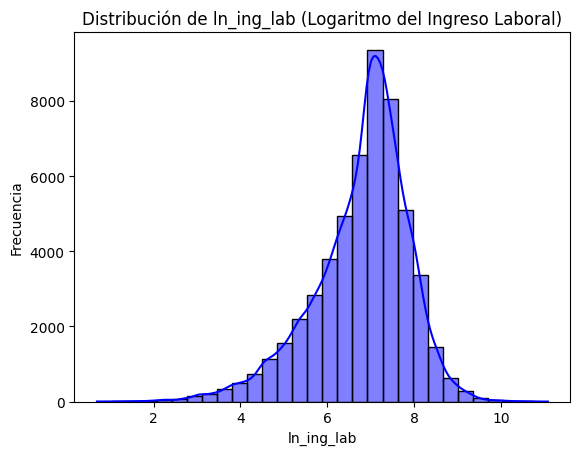

In [ ]:
# Visualización: Distribución de ingresos laborales logarítmicos
sns.histplot(df['ln_ing_lab'].dropna(), kde=True, bins=30, color='blue')
plt.title("Distribución de ln_ing_lab (Logaritmo del Ingreso Laboral)")
plt.xlabel("ln_ing_lab")
plt.ylabel("Frecuencia")
plt.show()

**3° Parte: Modelo econométrico**

**Modelo 1: Ecuación Mincer**

ln_ing_lab= B0 + B1(educ) + B2(exp) + B3(exp*exp) + B4(region_2) + e

In [ ]:
import statsmodels.api as sm

# Crear la variable exp al cuadrado
df_clean['exp_squared'] = df_clean['exp'] ** 2

# Definir las variables dependiente e independientes
X = df_clean[['educ', 'exp', 'exp_squared', 'region_2']]  # Variables independientes
y = df_clean['ln_ing_lab']  # Variable dependiente

# Agregar una constante (intercepto) al modelo
X = sm.add_constant(X)

# Ajustar el modelo de regresión
modelo = sm.OLS(y, X).fit()

# Resumen del modelo
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:             ln_ing_lab   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     3280.
Date:                Thu, 26 Dec 2024   Prob (F-statistic):               0.00
Time:                        06:56:00   Log-Likelihood:                -75114.
No. Observations:               53478   AIC:                         1.502e+05
Df Residuals:                   53473   BIC:                         1.503e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.4597      0.018    296.706      

<ipython-input-29-6ca32795aeb7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['exp_squared'] = df_clean['exp'] ** 2


**Modelo 2: Regresión cuantílica**

Cuantil 25

In [ ]:
import statsmodels.api as sm
from statsmodels.regression.quantile_regression import QuantReg

# Definir las variables dependiente e independientes
X = df_clean[['educ', 'exp', 'exp_squared', 'region_2']]  # Variables independientes
y = df_clean['ln_ing_lab']  # Variable dependiente

# Agregar una constante (intercepto) al modelo
X = sm.add_constant(X)

# Especificar el cuantil que deseas estimar (por ejemplo, 0.25 para el primer cuartil)
cuantil = 0.25

# Ajustar el modelo de regresión cuantílica
modelo_cuantil = QuantReg(y, X).fit(q=cuantil)

# Mostrar el resumen del modelo
print(modelo_cuantil.summary())


                         QuantReg Regression Results                          
Dep. Variable:             ln_ing_lab   Pseudo R-squared:               0.1232
Model:                       QuantReg   Bandwidth:                     0.09185
Method:                 Least Squares   Sparsity:                        3.430
Date:                Thu, 26 Dec 2024   No. Observations:                53478
Time:                        06:57:21   Df Residuals:                    53473
                                        Df Model:                            4
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.8613      0.029    169.008      0.000       4.805       4.918
educ            0.0961      0.002     53.062      0.000       0.093       0.100
exp             0.0394      0.001     34.823      0.000       0.037       0.042
exp_squared    -0.0006   1.66e-05    -38.270   

**Modelo 3: Regresión cuantílica**

Cuantil 50

In [ ]:
import statsmodels.api as sm
from statsmodels.regression.quantile_regression import QuantReg

# Definir las variables dependiente e independientes
X = df_clean[['educ', 'exp', 'exp_squared', 'region_2']]  # Variables independientes
y = df_clean['ln_ing_lab']  # Variable dependiente

# Agregar una constante (intercepto) al modelo
X = sm.add_constant(X)

# Especificar el cuantil que deseas estimar (por ejemplo, 0.25 para el primer cuartil)
cuantil = 0.50

# Ajustar el modelo de regresión cuantílica
modelo_cuantil = QuantReg(y, X).fit(q=cuantil)

# Mostrar el resumen del modelo
print(modelo_cuantil.summary())


                         QuantReg Regression Results                          
Dep. Variable:             ln_ing_lab   Pseudo R-squared:               0.1203
Model:                       QuantReg   Bandwidth:                      0.1051
Method:                 Least Squares   Sparsity:                        1.885
Date:                Thu, 26 Dec 2024   No. Observations:                53478
Time:                        06:57:32   Df Residuals:                    53473
                                        Df Model:                            4
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.6816      0.018    323.014      0.000       5.647       5.716
educ            0.0853      0.001     73.204      0.000       0.083       0.088
exp             0.0344      0.001     48.252      0.000       0.033       0.036
exp_squared    -0.0005   1.08e-05    -50.115   

**Modelo 4: Regresión cuantílica**

Cuantil 75

In [ ]:
import statsmodels.api as sm
from statsmodels.regression.quantile_regression import QuantReg

# Definir las variables dependiente e independientes
X = df_clean[['educ', 'exp', 'exp_squared', 'region_2']]  # Variables independientes
y = df_clean['ln_ing_lab']  # Variable dependiente

# Agregar una constante (intercepto) al modelo
X = sm.add_constant(X)

# Especificar el cuantil que deseas estimar (por ejemplo, 0.25 para el primer cuartil)
cuantil = 0.75

# Ajustar el modelo de regresión cuantílica
modelo_cuantil = QuantReg(y, X).fit(q=cuantil)

# Mostrar el resumen del modelo
print(modelo_cuantil.summary())


                         QuantReg Regression Results                          
Dep. Variable:             ln_ing_lab   Pseudo R-squared:               0.1230
Model:                       QuantReg   Bandwidth:                     0.09240
Method:                 Least Squares   Sparsity:                        2.094
Date:                Thu, 26 Dec 2024   No. Observations:                53478
Time:                        06:57:43   Df Residuals:                    53473
                                        Df Model:                            4
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.2125      0.017    358.549      0.000       6.179       6.246
educ            0.0809      0.001     67.380      0.000       0.079       0.083
exp             0.0318      0.001     46.645      0.000       0.030       0.033
exp_squared    -0.0005   1.05e-05    -44.001   

**4° Parte: Análisis de resultados**

**Análisis de la ecuación MINCER**

Los resultados de la regresión Minceriana proporcionan una visión clara de los factores que determinan el ingreso laboral en la muestra analizada. A continuación, se analizan los coeficientes estimados para las variables de interés:

**Constante (Intercepto) :** El coeficiente de la constante es 5.4597 , lo que indica el valor logarítmico del ingreso cuando todas las variables independientes son cero. Este valor es altamente significativo (p-valor < 0.000), lo que sugiere que el intercepto es estadísticamente relevante.

**Educación (educ) :** El coeficiente de la variable educ es 0.0869 , lo que indica que, manteniendo constantes las demás variables, cada año adicional de educación aumenta el logaritmo del ingreso en 0.0869 unidades. Este coeficiente es altamente significativo (p-valor < 0.000), lo que confirma que la educación tiene un impacto positivo y estadísticamente significativo sobre los ingresos.

**Experiencia laboral (exp) :**  El coeficiente para exp es 0.0356 , lo que sugiere que, ceteris paribus, cada año adicional de experiencia laboral aumenta el logaritmo del ingreso en 0.0356 unidades. Este resultado también es altamente significativo (p-valor < 0.000), lo que resalta el valor de la experiencia en la determinación del ingreso laboral.

**Experiencia laboral al cuadrado (exp_squared) :** El coeficiente de exp_squared es -0.0005 , lo que indica una relación no lineal entre la experiencia laboral y los ingresos. Este valor negativo sugiere que, después de cierto punto, el aumento de la experiencia laboral tiene un efecto decreciente sobre el ingreso. El coeficiente es también altamente significativo (p-valor < 0.000), lo que respalda la hipótesis de una relación cuadrática entre la experiencia y los ingresos.

**Región (region_2) :** El coeficiente para region_2 es ​​0.1898 , lo que indica que, en promedio, las personas que viven en la costa (valor 1) tienen un ingreso logarítmico superior en 0.1898 unidades en comparación con aquellos que residen en la sierra o selva (valor 0). Este coeficiente es altamente significativo (p-valor < 0.000), lo que implica que la ubicación geográfica tiene un impacto estadísticamente significativo sobre los ingresos.

**Análisis de las regresiones cuantílicas**

Análisis Comparativo de los Resultados de la Regresión Cuantílica (25, 50 y 75)

**1. Constante (Intercepto):**

Cantidad 25 : 4.8613

Cantidad 50 : 5.6816

Cuantía 75 : 6.2125

El intercepto muestra una tendencia ascendente a medida que aumentan los cuantiles. Esto sugiere que los individuos con mayores ingresos (cuantil 75) tienen un nivel base de ingreso más alto que aquellos en los cuantiles 25 y 50. Este patrón es consistente con la idea de que los trabajadores con mayores ingresos inician con una ventaja.

**2. Educación (educ):**

Cuantía 25 : 0,0961

Cantidad 50 : 0.0853

Cuantía 75 : 0,0809

El coeficiente de educación es positivo y significativo en todos los cuantiles, pero su valor disminuye conforme se aumenta el cuantil. La educación tiene un impacto relativamente mayor sobre los ingresos de los individuos en el cuantil 25 (bajos ingresos). Esto puede reflejar que las personas con menores ingresos experimentan un mayor retorno a la educación, dado que este grupo podría tener menos capital humano inicial.


**3. Experiencia Laboral (exp):**

Cuantía 25 : 0,0394

Cantidad 50 : 0.0344

Cuantía 75 : 0,0318

La experiencia laboral tiene un efecto positivo sobre los ingresos en todos los cuantiles, pero su impacto disminuye conforme aumentan los ingresos. Los trabajadores en el cuantil 25 experimentan un mayor retorno por año de experiencia, lo que sugiere que para aquellos con salarios más bajos, cada año adicional de experiencia tiene un mayor impacto en el ingreso.

**4. Experiencia Laboral al Cuadrado (exp_squared):**

Cuantía 25 : -0,0006

Cantidad 50 : -0.0005

Cuantía 75 : -0,0005

El coeficiente negativo para la experiencia cuadrática en todos los cuantiles indica una relación decreciente entre la experiencia y el ingreso. A medida que los individuos ganan más experiencia, el retorno por experiencia adicional se reduce. La magnitud del coeficiente es ligeramente mayor en el cuantil 25, lo que sugiere que el efecto decreciente es más fuerte en los trabajadores con ingresos más bajos.

**5. Región (region_2):**

Cuantía 25 : 0,2894

Cantidad 50 : 0,1625

Cuantía 75 : 0,1015

El coeficiente de la variable región_2 muestra una disminución significativa a medida que se sube en la distribución salarial. En el cuantil 25, la ventaja de vivir en la costa (región 2) es considerablemente más alta (0.2894), mientras que en los cuantiles 50 y 75 la ventaja disminuye a 0.1625 y 0.1015, respectivamente. Esto podría reflejar que la ubicación geográfica tiene un impacto más fuerte en los individuos de bajos ingresos, posiblemente debido a factores como la concentración de sectores económicos o empleos mejor remunerados en ciertas regiones.

**Conclusiones Globales:**

Efecto de la educación : La educación sigue teniendo un impacto positivo y significativo sobre los ingresos en todos los cuantiles. Sin embargo, el retorno a la educación es más pronunciado en los individuos con ingresos más bajos (cuantil 25). Esto podría indicar que los trabajadores de bajos ingresos se benefician más de la educación, tal vez porque poseen menos capital humano o acceden a empleos de alta calidad al inicio.

Efecto de la experiencia laboral : El retorno a la experiencia laboral también es positivo en todos los cuantiles, pero disminuye a medida que aumentan los ingresos. Los individuos con salarios más bajos obtienen un mayor retorno por cada año adicional de experiencia, mientras que los individuos con salarios más altos experimentan un retorno decreciente a la experiencia.

Efecto cuadrático de la experiencia : El coeficiente negativo de la experiencia cuadrática confirma que existe una relación no lineal entre la experiencia y los ingresos, con un retorno decreciente a medida que aumenta la experiencia. Este efecto es más pronunciado en los individuos de menores ingresos, lo que sugiere que la experiencia tiene un mayor valor para los trabajadores de bajos salarios.

Efecto de la región : La región tiene un impacto notable mayor en los individuos con ingresos más bajos (cuantil 25), lo que indica que los beneficios de vivir en la costa son más significativos para aquellos con salarios bajos. Este patrón podría estar relacionado con la concentración de oportunidades laborales mejores remuneradas en ciertas regiones del país.

**Resumen Final:**

Los resultados de la regresión cuantílica revelan diferencias sustanciales en los efectos de la educación, la experiencia y la ubicación geográfica sobre los ingresos según el cuantil de la distribución salarial. Mientras que la educación y la experiencia son más valiosas para los trabajadores de bajos ingresos, la ubicación geográfica tiene un impacto notable mayor en este grupo, sugiriendo que las políticas que aborden las desigualdades regionales y educativas podrían ser particularmente efectivas para mejorar los ingresos de los trabajadores de bajos salarios.